In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from codebook import get_codebook
# R package:   https://cran.r-project.org/web/packages/essurvey/vignettes/intro_ess.html

In [2]:
# Other format
#df=pd.read_sas('E:/tmp/ESS/ess9e01_2.sas7bdat')

In [4]:
# Download SPSS from https://www.europeansocialsurvey.org/download.html?file=ESS9e01_2&y=2018
df_9_in = load_pkl_or_SPSS('E:/tmp/ESS/ess9e01_2.sav')
cb_9, cb_9_flat = get_codebook('E:/playground/ESS/codebooks/ESS9')

admin.txt
country.txt
gender.txt
justfair.txt
media.txt
politics.txt
sociodemo.txt
timing.txt
values.txt
weight.txt
wellb.txt


In [5]:
# df_sas=pd.read_sas('E:/tmp/ESS/ess9e01_2.sas7bdat')

In [6]:
#df3=pd.read_stata('E:/tmp/ESS/ess9e01_2.dta', convert_categoricals=False)

In [7]:
codes={    'de' : {'de', 'de1', 'de2'}}
code_list=['bat', 'be', 'ach', 'afi']
l=[]
for col in df_9_in.columns:
    if col.endswith('de') or col.endswith('de1') or col.endswith('de2'):
        #print(df[col].value_counts())
        l.append(col.strip())
print("Grabbing all german related stuff")
print(len(l))
l

Grabbing all german related stuff
14


['prtvede1',
 'prtvede2',
 'prtclede',
 'rlgdnade',
 'rlgdeade',
 'edubde1',
 'eduade2',
 'edupbde1',
 'edupade2',
 'edufbde1',
 'edufade2',
 'edumbde1',
 'edumade2',
 'inwdde']

In [8]:
countries = ['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Cyprus', 'Czechia', 'Germany', 'Estonia', 'Finland', 'France', 'United Kingdom', 'Hungary', 'Ireland', 'Italy', 'Netherlands', 'Norway', 'Poland', 'Serbia', 'Slovenia', 'Spain', 'Israel', 'Iceland', 'Lithuania', 'Portugal', 'Russian Federation', 'Sweden']

In [9]:
by_country = {}
for country in countries:
    curr_dict={}
    for key, value in cb_9_flat.items():
        if ', ' + country in value:
            curr_dict[key] = value
    by_country[country] = curr_dict

In [10]:
print('number of columns specific for country')
for key, value in by_country.items():
    print(key, len(value))
    if len(value) > 0:
        for col in value: 
            df_9_in.drop(col, axis=1, inplace=True)

number of columns specific for country
Austria 8
Belgium 8
Bulgaria 6
Switzerland 8
Cyprus 8
Czechia 6
Germany 17
Estonia 6
Finland 8
France 6
United Kingdom 19
Hungary 8
Ireland 8
Italy 6
Netherlands 8
Norway 8
Poland 8
Serbia 8
Slovenia 6
Spain 0
Israel 0
Iceland 0
Lithuania 0
Portugal 0
Russian Federation 0
Sweden 0


In [11]:
print(df_9_in['cntry'].value_counts())

Italy             2745
Austria           2499
Czechia           2398
Germany           2358
Ireland           2216
United Kingdom    2204
Bulgaria          2198
Serbia            2043
France            2010
Estonia           1904
Belgium           1767
Finland           1755
Hungary           1698
Netherlands       1673
Switzerland       1542
Poland            1500
Norway            1406
Slovenia          1318
Cyprus             781
Name: cntry, dtype: int64


In [12]:
df_8=load_pkl_or_SPSS('E:/tmp/ESS/ess8e02_1.sav')
cb_8, cb_8_flat = get_codebook('E:/playground/ESS/codebooks/ESS8')

admin.txt
climatech.txt
country.txt
gender.txt
media.txt
politics.txt
sociodemo.txt
values.txt
weights.txt
welfare.txt
wellbeing.txt


In [13]:
def select_columns(df, df_other, cb):
    result = []
    for col in df.columns:
        if col not in df_other.columns and all( not (country in cb[col]) for country in countries) and not "SPLIT BALLOT" in cb[col]:
            if df[col].isnull().sum() < len(df)/3:
                result.append(col)
                #print(col,df_8[col].isnull().sum(), "\t",cb_2016_flat[col])
    return result

nine_not_in_8 = select_columns(df_9_in, df_8, cb_9_flat)
in_both = [col for col in df_9_in.columns if col in df_8.columns]
for col in nine_not_in_8:
    print(col, "\t", cb_9_flat[col])

admdw 	 Administration of how democracy works questions
evpdemp 	 Paid employment or apprenticeship at least 3 months 20 hours weekly
pdempyr 	 Year first started in paid employment or apprenticeship
lvpntyr 	 Year first left parents for living separately for 2 months or more
evlvptn 	 Ever lived with a spouse or partner for 3 months or more
lvptnyr 	 Year first lived with spouse or partner for 3 months or more
evmar 	 Are or ever been married
bthcld 	 Ever given birth to/ fathered a child
nbthcld 	 Number of children ever given birth to/ fathered
fcldbrn 	 Year (first) child was born
ggchld 	 Have any great grandchildren
admge 	 Administration of split ballot, ask about female or male
plnftr 	 Plan for future or take each day as it comes
iincsrc 	 Respondent's main source of income
frprtpl 	 Political system in country ensures everyone fair chance to participate in politics
gvintcz 	 Government in country takes into account the interests of all citizens
poltran 	 Decisions in country 

In [14]:

eight_not_in_9 = select_columns(df_8, df_9_in, cb_8_flat)
for col in eight_not_in_9:
    print(col, "\t", cb_8_flat[col])

mnrgtjb 	 Men should have more right to job than women when jobs are scarce
gvrfgap 	 Government should be generous judging applications for refugee status
rfgfrpc 	 Most refugee applicants not in real fear of persecution own countries
rfgbfml 	 Granted refugees should be entitled to bring close family members
eneffap 	 How likely to buy most energy efficient home appliance
rdcenr 	 How often do things to reduce energy use
cflsenr 	 How confident you could use less energy than now
elgcoal 	 How much electricity in [country] should be generated from coal
elgngas 	 How much electricity in [country] should be generated from natural gas
elghydr 	 How much electricity in [country] should be generated from hydroelectric power
elgnuc 	 How much electricity in [country] should be generated from nuclear power
elgsun 	 How much electricity in [country] should be generated from solar power
elgwind 	 How much electricity in [country] should be generated from wind power
elgbio 	 How much electricit

In [15]:
print('2018 nicht in 2016:\t', len(nine_not_in_8))
print('2016 nicht in 2018:\t', len(eight_not_in_9))
print('in both:\t', len(in_both))

2018 nicht in 2016:	 40
2016 nicht in 2018:	 69
in both:	 248


In [16]:
for category in ['politics', 'media']:
    print()
    print("<<<",category)
    for col in cb_9[category]:
        if col in in_both and df_9_in[col].isna().sum()< len(df_9_in)/3:
            print(col, "\t", cb_9_flat[col])


<<< politics
polintr 	 How interested in politics
psppsgva 	 Political system allows people to have a say in what government does
actrolga 	 Able to take active role in political group
psppipla 	 Political system allows people to have influence on politics
cptppola 	 Confident in own ability to participate in politics
trstprl 	 Trust in country's parliament
trstlgl 	 Trust in the legal system
trstplc 	 Trust in the police
trstplt 	 Trust in politicians
trstprt 	 Trust in political parties
trstep 	 Trust in the European Parliament
trstun 	 Trust in the United Nations
vote 	 Voted last national election
contplt 	 Contacted politician or government official last 12 months
wrkprty 	 Worked in political party or action group last 12 months
wrkorg 	 Worked in another organisation or association last 12 months
badge 	 Worn or displayed campaign badge/sticker last 12 months
sgnptit 	 Signed petition last 12 months
pbldmn 	 Taken part in lawful public demonstration last 12 months
bctprd 	 Boyc

In [17]:
print(list(cb_9.keys()))
for col,value in cb_9['sociodemo'].items():
    if col in df_9_in.columns:
        print(col,"\t", value)

['admin', 'country', 'gender', 'justfair', 'media', 'politics', 'sociodemo', 'timing', 'values', 'weight', 'wellb']
rshpsts 	 Relationship with husband/wife/partner currently living with
lvgptnea 	 Ever lived with a partner, without being married
dvrcdeva 	 Ever been divorced/had civil union dissolved
marsts 	 Legal marital status
maritalb 	 Legal marital status, post coded
chldhhe 	 Ever had children living in household
domicil 	 Domicile, respondent's description
eisced 	 Highest level of education, ESISCED
edulvlb 	 Highest level of education
eduyrs 	 Years of full-time education completed
pdwrk 	 Doing last 7 days: paid work
edctn 	 Doing last 7 days: education
uempla 	 Doing last 7 days: unemployed, actively looking for job
uempli 	 Doing last 7 days: unemployed, not actively looking for job
dsbld 	 Doing last 7 days: permanently sick or disabled
rtrd 	 Doing last 7 days: retired
cmsrv 	 Doing last 7 days: community or military service
hswrk 	 Doing last 7 days: housework, looking

In [18]:

            #print()

In [19]:
pass

In [20]:
def add_another_null(df, df_in, name, value, order=None):
    tmp_col = df_in[name].copy()
    tmp_categories = list(tmp_col.cat.categories.copy())
    index = tmp_categories.index(value)
    tmp_categories.pop(index)
    codes = tmp_col.cat.codes.copy()
    codes[codes==index] = -1
    codes[codes>=index] -= 1
    cat_type = pd.CategoricalDtype(tmp_categories, ordered=False)
    #print(cat_type)
    #print(codes)
    if order is None:
        df[name] = pd.Categorical.from_codes(codes=codes, dtype=cat_type)
    else:
        df[name] = pd.Categorical.from_codes(codes=codes, dtype=cat_type).reorder_categories(order)

In [21]:
import pysubgroup as ps
from functools import partial
def assign_reordered_categories(df,df_in,col,rename):
    df[col] = df_in[col].copy()
    df[col].cat.reorder_categories(rename)

def prepare_columns(df_in, includes, cb=cb_9_flat):
    #df = #df_in.copy()
    df = pd.DataFrame()
    cat_reorder = partial(assign_reordered_categories, df, df_in)
    if 'media' in includes:
        # media
        df['nwspol'] = df_in['nwspol'].astype('float')
        cat_reorder('netusoft',["Never", 'Only occasionally', 'A few times a week', 'Most days', 'Every day'])
        df['netustm'] = df_in['netustm'].astype('float')
        cat_reorder('ppltrst', ["You can't be too careful"]+ [str(i) for i in range(1,10)]+['Most people can be trusted'])
        cat_reorder('pplfair', ["Most people try to take advantage of me"]+ [str(i) for i in range(1,10)]+['Most people try to be fair'])
        cat_reorder('pplhlp', ["People mostly look out for themselves"]+ [str(i) for i in range(1,10)]+['People mostly try to be helpful'])
    
    # gender
    df['yrbrn'] = df_in['yrbrn'].astype('float')
    df['hhmmb'] = df_in['hhmmb'].copy().astype(float)
    # gndr is fine
    df['agea'] = df_in['agea'].copy().astype(float)
       # skipping household members
    if 'justfair' in includes:
        # justfair
        cat_reorder('infqbst', ['Weekly', 'Monthly', 'Annual'])
        just_fair_order = ['Not at all', 'Very little', 'Some', 'A lot', 'A great deal']
        just_fair_order2= ['Does not apply at all'] + [str(i) for i in range(1,10)] + ['Applies completely']
        cat_reorder('frprtpl', just_fair_order)
        cat_reorder('gvintcz', just_fair_order)
        cat_reorder('poltran', just_fair_order)
        cat_reorder('ifrjob',  just_fair_order2)
        #cat_reorder('ifredu',  just_fair_order2) # This column has another value
        cat_reorder('evfredu', just_fair_order2)
        cat_reorder('evfrjob', just_fair_order2)
        tmp_order = ['Low, extremely unfair',  'Low, very unfair',  'Low, somewhat unfair', 'Low, slightly unfair', 'Fair', 'High, slightly unfair', 'High, somewhat unfair', 'High, very unfair', 'High, extremely unfair',]
        cat_reorder('grspfr', tmp_order)
        cat_reorder('netifr', tmp_order)     
        cat_reorder('occinfr', tmp_order)
        cat_reorder('topinfr', tmp_order)
        cat_reorder('btminfr', tmp_order)
        tmp_order = ['Not much or no influence', 'Some influence', 'Quite a lot of influence', 'A great deal of influence']
        cat_reorder('recskil', tmp_order)
        cat_reorder('recexp', tmp_order)
        cat_reorder('recknow', tmp_order)
        cat_reorder('recimg', tmp_order)
        cat_reorder('recgndr', tmp_order)
        tmp_order = ['Agree strongly', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Disagree strongly']
        cat_reorder('sofrdst',tmp_order)
        cat_reorder('sofrwrk',tmp_order)
        cat_reorder('sofrpr' ,tmp_order)
        cat_reorder('sofrprv',tmp_order)
        cat_reorder('ppldsrv',tmp_order)
        cat_reorder('jstprev',tmp_order)
        cat_reorder('pcmpinj',tmp_order)
        cat_reorder('wltdffr' , ['Small, extremely unfair',  'Small, very unfair',  'Small, slightly unfair', 'Small, somewhat unfair',
                                 'Fair',
                                'Large, slightly unfair', 'Large, somewhat unfair', 'Large, very unfair', 'Large, extremely unfair'])
          # remaining ommitted
        add_another_null(df, df_in, 'ifredu', 'I have not completed a level of education yet', just_fair_order2)
    
    # politics
    type1 = ['trstprl','trstlgl','trstplc','trstplt','trstprt','trstep','trstun']
    type1_order = ['No trust at all'] + [str(i) for i in range(1,10)] + ['Complete trust']
    for col in type1:
        #print(col)
        cat_reorder(col , type1_order)
        
    type2 = ['stflife', 'stfeco', 'stfgov', 'stfdem']
    type2_order = ['Extremely dissatisfied']+ [str(i) for i in range(1,10)] + ['Extremely satisfied']
    for col in type2:
        cat_reorder(col , type2_order)
    
    cat_reorder('stfedu', ['Extremely bad']+ [str(i) for i in range(1,10)] + [ 'Extremely good'])
    cat_reorder('stfhlth', ['Extremely bad']+ [str(i) for i in range(1,10)] + [ 'Extremely good'])
    
    
    cat_reorder('euftf', ['Unification already gone too far']+ [str(i) for i in range(1,10)] + ['Unification go further'])
    cat_reorder('imbgeco', ['Bad for the economy']+ [str(i) for i in range(1,10)] + ['Good for the economy'])
    cat_reorder('imueclt', ['Cultural life enriched']+ [str(i) for i in range(1,10)] + ['Cultural life undermined'])
    cat_reorder('imwbcnt', ['Better place to live']+ [str(i) for i in range(1,10)] + ['Worse place to live'])
    
    cat_reorder('lrscale', ['Left']+ [str(i) for i in range(1,10)] + [ 'Right'])
    
    cat_reorder('polintr', reversed(['Not at all interested', 'Hardly interested', 'Quite interested', 'Very interested']))
    cat_reorder('psppsgva', ['Not at all', 'Very little', 'Some', 'A lot', 'A great deal'])
    cat_reorder('actrolga', ['Not at all able', 'A little able',  'Quite able', 'Very able', 'Completely able'])
    cat_reorder('psppipla', ['Not at all', 'Very little', 'Some', 'A lot', 'A great deal'])
    cat_reorder('cptppola' , ['Not at all confident', 'A little confident',  'Quite confident', 'Very confident', 'Completely confident'])
    cat_reorder('prtdgcl' , ['Very close', 'Quite close', 'Not close', 'Not at all close'])
    tmp_order = ['Agree strongly', 'Agree', 'Neither agree nor disagree', 'Disagree', 'Disagree strongly' ]
    cat_reorder('gincdif', tmp_order)
    cat_reorder('freehms',  tmp_order)
    cat_reorder('hmsfmlsh', tmp_order)
    cat_reorder('hmsacld', tmp_order)
    tmp_order = ['Allow many to come and live here', 'Allow some', 'Allow a few', 'Allow none']
    cat_reorder('imsmetn' , tmp_order)
    cat_reorder('imdfetn' , tmp_order)
    cat_reorder('impcntr' , tmp_order)
    
    # sociodemo
    tmp_order = ['I have/had no influence']+ [str(i) for i in range(1,10)] + ['I have/had complete control']
    cat_reorder('wkdcorga', tmp_order)
    cat_reorder('iorgact', tmp_order)
    cat_reorder('estsz' , ['Under 10', '10 to 24', '25 to 99', '100 to 499', '500 or more'])
    
    if 'timing' in includes:
        # timing
        cat_reorder('plnftr', ['I plan for my future as much as possible']+ [str(i) for i in range(1,10)] + ['I just take each day as it comes']) 
        add_another_null(df, df_in,'ggchld', 'Not applicable', ['No', 'Yes'])
        df['nbthcld'] = df_in['nbthcld'].astype(float)
    
    
    # wellb
    cat_reorder('happy', ['Extremely unhappy'] + [str(i) for i in range(1,10)] + ['Extremely happy'])
    cat_reorder('atchctr', ['Not at all emotionally attached'] + [str(i) for i in range(1,10)] + ['Very emotionally attached'])
    cat_reorder('atcherp', ['Not at all emotionally attached'] + [str(i) for i in range(1,10)] + ['Very emotionally attached'])
    cat_reorder('rlgdgr', ['Not at all religious'] + [str(i) for i in range(1,10)] + ['Very religious'])
    cat_reorder('sclmeet', ['Never', 'Less than once a month', 'Once a month', 'Several times a month', 'Once a week', 'Several times a week', 'Every day'])
    cat_reorder('inprdsc' , ['None', '1', '2', '3', '4-6', '7-9', '10 or more'])
    cat_reorder('sclact' , ['Much less than most', 'Less than most','About the same', 'More than most',  'Much more than most'])
    cat_reorder('aesfdrk' , ['Very safe', 'Safe', 'Unsafe', 'Very unsafe'])
    cat_reorder('health' , ['Very good','Good', 'Fair', 'Bad', 'Very bad'])
    relg_order = ['Every day', 'More than once a week', 'Once a week', 'At least once a month', 'Only on special holy days', 'Less often', 'Never']
    cat_reorder('rlgatnd', relg_order)
    cat_reorder('pray', relg_order)
    
    
    
    
    # values
    like_mes = ['ipcrtiv', 'imprich', 'ipeqopt', 'ipshabt', 'impsafe', 'impdiff', 'ipfrule', 'ipudrst', 'ipmodst', 'ipgdtim',
     'impfree', 'iphlppl', 'ipsuces', 'ipstrgv', 'ipadvnt', 'ipbhprp', 'iprspot', 'iplylfr', 'impenv', 'imptrad', 'impfun']
    like_me_order = ['Very much like me', 'Like me','Somewhat like me', 'A little like me', 'Not like me', 'Not like me at all']
    for col in like_mes:
        cat_reorder(col, like_me_order)
    
    
    for col in ['inwmms','inwyys', 'inwmme', 'inwyye', 'yrbrn11', 'yrbrn12','yrbrn13','yrbrn14','yrbrn15']:
        if col in df_in.columns:
            df[col] = df_in[col].copy().astype(float)
        else:
            print('skipping '+col)
    
    special_values = {'lvpntyr':{'Still in parental home, never left 2 months' : 0, 'Never lived with a parent' : np.nan},
                      'ageadlt': {'It depends':np.nan}}
    has_special_values = ['lvpntyr','ageadlt']
    simple_nominal = ['nacer2', 'isco08', 'isco08p', 'anctry1', 'anctry2', 'region', 'cntry', 
                      'ctzshipd', 'cntbrthd', 'lnghom1','lnghom2', 'fbrncntc', 'mbrncntc', 'vote', 'fvgabc',
                     'rshpsts','marsts','maritalb','domicil','mainact','emplrel','iincsrc', #work related
                      'tporgwk', 'mbtru', 'hincsrca', 'hincfel', 'emprf14', 'occf14b', 'emprm14', 'occm14b',
                     'mnactic', 'mnactp', 'emprelp', 'regunit', 'wrkctra',
                     'rlgdnm', 'rlgdnme', 'hlthhmp', 'vteurmmb', 'vteubcmb',
                     'ctzshipc', 'cntbrthc', 'fbrncntb', 'mbrncntb']
    for col in reversed(df_in.columns):

        if col in df.columns or "SPLIT BALLOT" in cb[col]:
            continue
        if col.startswith('edlv') or col.startswith('edulvl'):
            continue
        if (col in simple_nominal or col.startswith('gndr') or col.startswith('rshipa') or col.startswith('prtvt') or
            col.startswith('prtvb') or col.startswith('prtcl') or col.startswith('rlgdn') or col.startswith('rlgde') ):
            df[col] = df_in[col].copy()
            continue
        if col in has_special_values:
            continue
        if (col.startswith('eduade') or col.startswith('edagegb') or col.startswith('edubil') or col.startswith('eduail') or
           col.startswith('edupade') or col.startswith('edagepgb') or col == 'edupbil1' or col=='edufade3' or col=='edagefgb' or
            col =='edufbil1' or col == 'edumade3' or col=='edumbil1'):
            continue # skipping for now
        #print(repr(col), cb[col])
            
        if col not in ['edulvlb']:
            num_values = None
            try:
                num_values = len(df_in[col].cat.categories)
            except AttributeError:
                if repr(df_in[col].dtype) in ["dtype('O')", "dtype('float64')"]:
                    df[col] = df_in[col].copy()
                    continue
            if not num_values is None:
                if num_values > 12:
                    df[col] = df_in[col].astype(float)
                # No yes questions
                elif num_values == 2 and all(cat in ['No', 'Yes'] for cat in df_in[col].cat.categories ):
                    cat_reorder(col, ['No', 'Yes'])
            
    return df
df_8_prepared = prepare_columns(df_8, list(cb_8.keys()), cb=cb_8_flat)

skipping yrbrn13
skipping yrbrn14
skipping yrbrn15


In [22]:
df_9_prepared = prepare_columns(df_9_in, list(cb_9.keys()))

In [23]:
# print columns that are not yet handled correctly
i=0
for key in cb_9.keys():

    for col in cb_9[key]:
        if col in df_9_in.columns:
            if col not in df_9_prepared.columns:
                num_fails = 0
                vals = []
                #print(repr(df_9_in[col].dtype))
                if repr(df_9_in[col].dtype) in ["dtype('O')", "dtype('float64')"]:
                    print(col, 'object')
                    continue
                for val in df_9_in[col].cat.categories:
                    try:
                        tmp = int(val)
                    except ValueError:
                        vals.append(val)
                        num_fails+=1
                num_categories = len(df_9_in[col].cat.categories)

                if num_categories >12:
                    print(col, 'large')
                elif num_fails==2 and num_categories>4 :
                    print(col, vals)
                print(repr(col),',', vals)
                i+=1
print(i)

'grsplet' , ['D - 3rd category', 'F - 9th category', 'G - 5th category', 'J - 10th category', 'K - 1st category', 'L - 7th category', 'N - 4th category', 'Q - 8th category', 'S - 2nd category', 'T - 6th category']
'netilet' , ['D - 3rd category', 'F - 9th category', 'G - 5th category', 'J - 10th category', 'K - 1st category', 'L - 7th category', 'N - 4th category', 'Q - 8th category', 'S - 2nd category', 'T - 6th category']
'eisced' , ['ES-ISCED I , less than lower secondary', 'ES-ISCED II, lower secondary', 'ES-ISCED IIIa, upper tier upper secondary', 'ES-ISCED IIIb, lower tier upper secondary', 'ES-ISCED IV, advanced vocational, sub-degree', 'ES-ISCED V1, lower tertiary education, BA level', 'ES-ISCED V2, higher tertiary education, >= MA level', 'Other']
edulvlb large
'edulvlb' , ['General ISCED 2A, access ISCED 3A general/all 3', 'General ISCED 3 >=2 years, no access ISCED 5', 'General ISCED 3A, access upper tier ISCED 5A/all 5', 'General ISCED 3A/3B, access ISCED 5B/lower tier 5A',

In [24]:
df_9 = df_9_prepared

In [25]:
def create_selectors(df):
    ps.create_numeric_selector_for_attribute(df, 'nwspol'+'_codes')
    ps.create_nominal_selectors_for_attribute(df, 'netusoft'+'_codes')
    ps.create_numeric_selector_for_attribute(df, 'netustm'+'_codes')
    ps.create_numeric_selector_for_attribute(df, 'ppltrst'+'_codes')
    ps.create_numeric_selector_for_attribute(df, 'pplfair'+'_codes')
    ps.create_numeric_selector_for_attribute(df, 'pplhlp'+'_codes')
    
    ps.create_nominal_selectors_for_attribute(df, 'netusoft')

In [26]:
cb_9['media']

{'nwspol': 'News about politics and current affairs, watching, reading or listening, in minutes',
 'netusoft': 'Internet use, how often',
 'netustm': 'Internet use, how much time on typical day, in minutes',
 'ppltrst': "Most people can be trusted or you can't be too careful",
 'pplfair': 'Most people try to take advantage of you, or try to be fair',
 'pplhlp': 'Most of the time people helpful or mostly looking out for themselves'}

In [27]:
df_9['ppltrst'].isna().sum()

109

In [28]:
import RDMM

In [29]:
import RDMM.correlation_quality_functions as correlations
import RDMM.generic_quality_measures as generics
import numpy as np
na_sel = np.any([df_9[col].isnull() for col in cb_9['media'].keys()],axis=0)
np.count_nonzero(na_sel)
len(df_9)
corr_m = correlations.CorrelationModel([col for col in cb_9['media'].keys()])

In [30]:
from collections import namedtuple
task_dummy = namedtuple('task_dummy', ['data'])

corr_m.calculate_constant_statistics(task_dummy(df_9[np.logical_not(na_sel)]))

using codes for netusoft
using codes for ppltrst
using codes for pplfair
using codes for pplhlp


In [31]:
corr_m.fit(slice(None))

correlation_model_tpl(size_sg=24740, correlation_matrix=array([[ 1.        ,  0.02705461,  0.04303077, -0.0039903 , -0.01128369,
        -0.00671321],
       [ 0.02705461,  1.        , -0.19260533, -0.01381412, -0.03867004,
        -0.0050815 ],
       [ 0.04303077, -0.19260533,  1.        ,  0.00384342, -0.0033343 ,
        -0.02172393],
       [-0.0039903 , -0.01381412,  0.00384342,  1.        ,  0.45952663,
         0.38701078],
       [-0.01128369, -0.03867004, -0.0033343 ,  0.45952663,  1.        ,
         0.44139509],
       [-0.00671321, -0.0050815 , -0.02172393,  0.38701078,  0.44139509,
         1.        ]]))

In [32]:
[col for col in cb_9['media'].items()]

[('nwspol',
  'News about politics and current affairs, watching, reading or listening, in minutes'),
 ('netusoft', 'Internet use, how often'),
 ('netustm', 'Internet use, how much time on typical day, in minutes'),
 ('ppltrst', "Most people can be trusted or you can't be too careful"),
 ('pplfair', 'Most people try to take advantage of you, or try to be fair'),
 ('pplhlp',
  'Most of the time people helpful or mostly looking out for themselves')]

In [33]:
from RDMM.generic_quality_measures import *
from itertools import chain

model_cols = [col for col in cb_9['media'].keys()]


In [34]:
def create_searchspace(df):
    columns = ['hhmmb', 'gndr', 'polintr', 'psppsgva', 'actrolga', 'psppipla', 'cptppola', 'trstlgl', 'trstplc',
               'trstplt', 'trstep', 'trstun', 'trstprt', 'trstprl', 'vote']
    search_space_nominal = list(chain.from_iterable([ps.create_nominal_selectors_for_attribute(df, col) for col in columns]))
    numeric_columns = ['yrbrn']
    search_space_numeric = list(chain.from_iterable([ps.create_numeric_selector_for_attribute(df, col) for col in numeric_columns]))
    return search_space_nominal + search_space_numeric

In [35]:

corr_m = correlations.CorrelationModel(model_cols)
qf = ps.GeneralizationAwareQF(Ex_Distance(corr_m, correlations.Correlation_L_Distance(1), invert=False))
df_no_na= df_9[np.logical_not(na_sel)]

In [36]:
search_space = create_searchspace(df_no_na)


task = ps.SubgroupDiscoveryTask(df_no_na, ps.FITarget(), search_space,qf, depth=2, constraints=[ps.MinSupportConstraint(200)])
doEMM=False
if doEMM:
    result = ps.SimpleSearch(show_progress=True).execute(task)

In [37]:
df_no_na.columns

Index(['nwspol', 'netusoft', 'netustm', 'ppltrst', 'pplfair', 'pplhlp',
       'yrbrn', 'hhmmb', 'agea', 'infqbst',
       ...
       'wrkorg', 'wrkprty', 'contplt', 'vote', 'cntry', 'idno', 'proddate',
       'edition', 'essround', 'name'],
      dtype='object', length=259)

In [38]:
#print(list(cb_8.keys()))
#cb_8['climatech']

In [39]:
if doEMM:
    df_result=result.to_dataframe(include_info=True)
    df_result

In [40]:
print(cb_9_flat['trstlgl'])
print(cb_9_flat['trstun'])

Trust in the legal system
Trust in the United Nations


In [41]:
import matplotlib.pyplot as plt
if doEMM:
    arr=result.supportSetVisualization()
    plt.matshow(arr)

In [42]:
if doEMM:
    fit_0=corr_m.fit(slice(None), df_no_na).correlation_matrix
    plt.matshow(fit_0-np.diag( [1,1,1,1,1,1]),cmap='coolwarm',vmin=-0.5, vmax=0.5,)
    print(model_cols)
    for i in range(10):
        arr = corr_m.fit(df_result['description'][i], df_no_na).correlation_matrix-fit_0
        #print(np.min(arr))
        #print(np.sum(np.abs(arr)))
        #print(np.linalg.norm(arr.flatten(),ord=1))
        plt.matshow(arr, vmin=-0.25, vmax=0.25, cmap='coolwarm')
        plt.show()

In [43]:
for key,value in cb_9_flat.items():
    if 'trst' in key:
        print(key, value)

ppltrst Most people can be trusted or you can't be too careful
trstprl Trust in country's parliament
trstlgl Trust in the legal system
trstplc Trust in the police
trstplt Trust in politicians
trstprt Trust in political parties
trstep Trust in the European Parliament
trstun Trust in the United Nations


In [44]:
pass

In [45]:
def create_9_selectors(df,ignore=[]):
    return ps.create_selectors(df, ignore=ignore)

def create_8_selectors(df,ignore=[]):
    return ps.create_selectors(df, ignore=ignore)

def get_null_vec(df, name):
    column = df[name]
    if column.dtype.name=='float64':
        return np.isnan(column.to_numpy())
    elif column.dtype.name=='category':
        return column.cat.codes < 0
    else:
        raise ValueError(f"Unsupported dtype for column {name}: {column.dtype.name}")

def discard_null(searchspace):
    if True:
        return [x for x in searchspace if not 'isnull()' in repr(x)]
    else:
        return searchspace
def run_single_task(df_8_in, df_9_in, Qf_L, Qf_R, sim_fun, total_fun, parameters, model_columns):
    
    na_9 = np.any([get_null_vec(df_9_in, col) for col in model_columns], axis=0)
    na_8 = np.any([get_null_vec(df_8_in, col) for col in model_columns], axis=0)

    df_9 = df_9_in[np.logical_not(na_9)]
    df_8 = df_8_in[np.logical_not(na_8)]
    
    print(f"dropping {np.count_nonzero(na_8)} instances for first : {len(df_8)} remainung")
    print(f"dropping {np.count_nonzero(na_9)} instances for second: {len(df_9)} remainung")
    
    sels_8=discard_null(create_8_selectors(df_8, ignore=model_columns))
    print(len(sels_8))
    sels_9=discard_null(create_9_selectors(df_9, ignore=model_columns))
    print(len(sels_9))
    
    task_L = ps.SubgroupDiscoveryTask(df_8, None, sels_8, Qf_L, result_set_size = parameters.result_size, depth=2, constraints=parameters.constraints)
    task_L.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#parameters.result_size)
    task_R = ps.SubgroupDiscoveryTask(df_9, None, sels_9, Qf_R, result_set_size = parameters.result_size, depth=2, constraints=parameters.constraints)
    task_R.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#(parameters.result_size)
    similarity_function = sim_fun
    run=beam_search_through_candidates(task_L, task_R, parameters.total_result_size, None, similarity_function, total_fun, show_progress=True)

    tpl_L=next(run)
    tpl_R=next(run)
    result=next(run)
    return result, df_8, df_9

In [46]:
from collections import namedtuple
from RDMM.model_algorithm import beam_search_through_candidates, to_dataframe
trust_columns = ['ppltrst', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun']
nine_not_in_8_narrowed = [x for x in nine_not_in_8 if x not in ['admdw', 'admge', 'lvpntyr']]
df_8_in = df_8[trust_columns+eight_not_in_9]
df_9_in = df_9_prepared[trust_columns+nine_not_in_8_narrowed]


mine_pair_parameters = namedtuple('mine_pair_parameters',['result_size','total_result_size','depth','task_name','constraints'])
parameters=mine_pair_parameters(500,100,2,'mine_pair',[ps.MinSupportConstraint(200)])


corr_m = correlations.CorrelationModel(trust_columns)
qf = Ex_Distance(corr_m, correlations.Correlation_L_Distance(1), invert=False)
corr_m2 = correlations.CorrelationModel(trust_columns)
qf2 = Ex_Distance(corr_m2, correlations.Correlation_L_Distance(1), invert=False)
sim_qf = Sim_Direct_Distance(corr_m, corr_m2, correlations.Correlation_L_Distance(1))
alpha=0.1
beta=0.5
from RDMM.evaluation_framework import final_qf
import functools
out, df1, df2 = run_single_task(df_8_in, df_9_in, qf, qf2, sim_qf, functools.partial(final_qf,alpha,beta), parameters, model_columns=trust_columns)
result = list(sorted(out))

dropping 5604 instances for first : 38783 remainung
dropping 4527 instances for second: 31488 remainung
413
215

  0%|                                      | 77/85491 [00:00<01:52, 756.92it/s]


using codes for ppltrst
using codes for trstprl
using codes for trstlgl
using codes for trstplc
using codes for trstplt
using codes for trstprt
using codes for trstep
using codes for trstun
using codes for ppltrst
using codes for trstprl
using codes for trstlgl
using codes for trstplc
using codes for trstplt
using codes for trstprt
using codes for trstep
using codes for trstun
using codes for ppltrst
using codes for trstprl
using codes for trstlgl
using codes for trstplc
using codes for trstplt
using codes for trstprt
using codes for trstep
using codes for trstun


  0%|▏                                    | 380/85491 [00:00<01:55, 737.56it/s]e:\Playground\ESS\env\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
e:\Playground\ESS\env\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
e:\Playground\ESS\env\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
e:\Playground\ESS\env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
e:\Playground\ESS\env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
 13%|████▌                              | 11048/85491 [00:18<01:54, 647.33it/s]e:\Playground\ESS\env\lib\site-packages\numpy\lib\function_base.p

using codes for ppltrst
using codes for trstprl
using codes for trstlgl
using codes for trstplc
using codes for trstplt
using codes for trstprt
using codes for trstep
using codes for trstun


  1%|▎                                    | 185/23220 [00:00<00:25, 907.63it/s]e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:147: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:147: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
100%|███████████████████████████████| 250000/250000 [00:03<00:00, 69454.86it/s]


In [47]:
print(len(eight_not_in_9))
print(len(nine_not_in_8))

69
40


In [48]:
print([col for col in df_9.columns if 'trust' in cb_9_flat[col].lower()])

['ppltrst', 'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun']


In [49]:
[(col, cb_8_flat[col]) for col in df_8.columns if 'trst' in col]

[('ppltrst', "Most people can be trusted or you can't be too careful"),
 ('trstprl', "Trust in country's parliament"),
 ('trstlgl', 'Trust in the legal system'),
 ('trstplc', 'Trust in the police'),
 ('trstplt', 'Trust in politicians'),
 ('trstprt', 'Trust in political parties'),
 ('trstep', 'Trust in the European Parliament'),
 ('trstun', 'Trust in the United Nations')]

In [50]:
print(len(df_8_in.columns))
print(len(eight_not_in_9))

77
69


In [51]:
for key in nine_not_in_8:
    print(cb_9_flat[key])

Administration of how democracy works questions
Paid employment or apprenticeship at least 3 months 20 hours weekly
Year first started in paid employment or apprenticeship
Year first left parents for living separately for 2 months or more
Ever lived with a spouse or partner for 3 months or more
Year first lived with spouse or partner for 3 months or more
Are or ever been married
Ever given birth to/ fathered a child
Number of children ever given birth to/ fathered
Year (first) child was born
Have any great grandchildren
Administration of split ballot, ask about female or male
Plan for future or take each day as it comes
Respondent's main source of income
Political system in country ensures everyone fair chance to participate in politics
Government in country takes into account the interests of all citizens
Decisions in country politics are transparent
Compared other people in country, fair chance achieve level of education I seek
Compared other people in country, fair chance get job I 

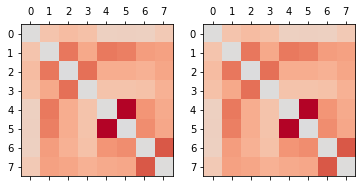

0.8761278487488616 343 663
sbsrnen=='Neither in favour nor against' AND slvpens=='Extremely bad' 	 evpdemp=='No' AND poltran=='Not at all'


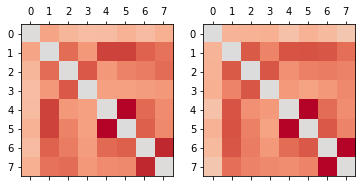

0.8584827560151985 736 619
imsclbn=='They should never get the same rights' AND lknemny=='Likely' 	 evpdemp=='No' AND frprtpl=='Not at all'


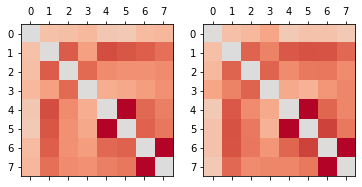

0.8553010355036217 736 633
imsclbn=='They should never get the same rights' AND lknemny=='Likely' 	 ifredu=='Does not apply at all' AND ifrjob=='Does not apply at all'


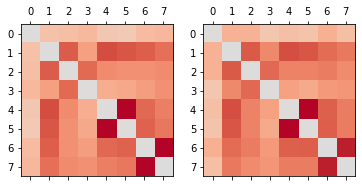

0.8108199601697128 538 231
eudcnbf=='Neither higher nor lower' AND wrdpfos=='Not at all worried' 	 occinfr=='Low, very unfair' AND wltdffr=='Small, somewhat unfair'


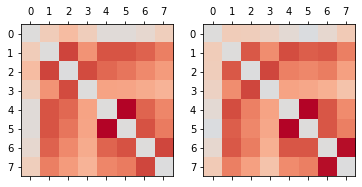

0.8062942142625199 621 1439
imsclbn=='They should never get the same rights' AND pspwght>=1.25 	 evpdemp=='No' AND jstprev=='Agree'


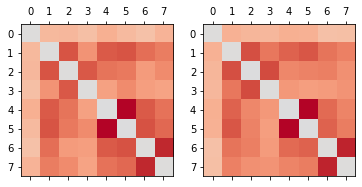

0.8045256826808617 621 535
imsclbn=='They should never get the same rights' AND pspwght>=1.25 	 occinfr=='Low, extremely unfair' AND recgndr=='Not much or no influence'


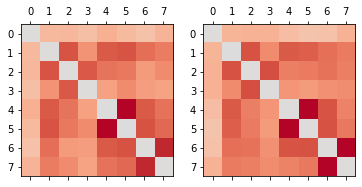

0.7967032046933319 494 521
mnrgtjb=='Agree' AND wrtratc=='Not at all worried' 	 evpdemp=='No' AND fcldbrn<1973.0


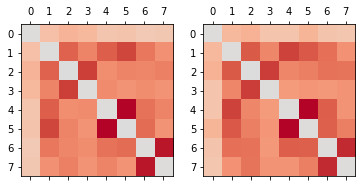

0.7897035367650131 429 1439
ccgdbd=='6' AND inctxff=='Somewhat in favour' 	 evpdemp=='No' AND jstprev=='Agree'


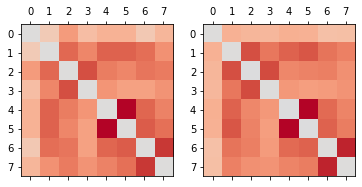

0.7867790514743481 357 539
imsclbn=='They should never get the same rights' AND wrpwrct=='Very worried' 	 fvgabc=='Pay' AND wltdffr=='Small, extremely unfair'


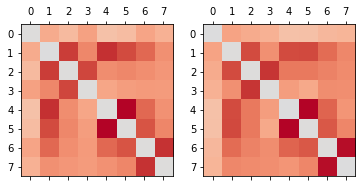

In [152]:
the_diag= np.diag( [1,1,1,1,1,1,1,1])
fig, (ax1, ax2) = plt.subplots(1, 2)
fit_0=corr_m.fit(slice(None), df1).correlation_matrix
vmin = -0.7
vmax = 0.7

ax1.matshow(fit_0-the_diag,cmap='coolwarm',vmin=vmin, vmax=vmax)

fit_0=corr_m.fit(slice(None), df2).correlation_matrix
ax2.matshow(fit_0-the_diag,cmap='coolwarm',vmin=vmin, vmax=vmax)
plt.show()
    #print(np.min(arr))
    #print(np.sum(np.abs(arr)))
    #print(np.linalg.norm(arr.flatten(),ord=1))
    #
result2=list(reversed(result))
for q, tpl in result2[1:10]:
    #if not 'isnull' in repr(tpl[0]):
    print(q, tpl[2].size_sg, tpl[3].size_sg)
    print(tpl[0], "\t" ,tpl[1])
    fig, (ax1, ax2) = plt.subplots(1, 2)
    arr=(tpl[2].correlation_matrix-the_diag)
    ax1.matshow(arr, vmin=vmin, vmax=vmax, cmap='coolwarm')
    arr=(tpl[3].correlation_matrix-the_diag)
    ax2.matshow(arr, vmin=vmin, vmax=vmax, cmap='coolwarm')
    #fig.show()
    plt.show()


In [53]:
print(cb_8_flat['lklmten'])
print(cb_8_flat['gvrfgap'])
print(cb_8_flat['mnrgtjb'])
print(cb_8_flat['clmchng'])

How likely, large numbers of people limit energy use
Government should be generous judging applications for refugee status
Men should have more right to job than women when jobs are scarce
Do you think world's climate is changing


In [54]:
print(cb_9_flat['evlvptn'])
print(cb_9_flat['evpdemp'])
print(cb_9_flat['occinfr'])

Ever lived with a spouse or partner for 3 months or more
Paid employment or apprenticeship at least 3 months 20 hours weekly
Net [pay/pensions/social benefits] of people same occupation as you in country, how fair


In [65]:
df_8_trust = df_8[trust_columns]

In [153]:
from tqdm import tqdm_notebook
def calc_p_value(df_L, df_R, size_l, size_r, ex_qfs, sim_qf, final_qf,  repetitions):
    ex_l, ex_r = ex_qfs
    l=np.arange(len(df_L))
    r=np.arange(len(df_R))
    qualities = np.zeros(repetitions)
    size_factor =  min(size_l/len(df_L), size_r/len(df_R))
    f_qf = functools.partial(final_qf,alpha,beta)
    for i in tqdm_notebook(range(repetitions)):
        np.random.shuffle(l)
        np.random.shuffle(r)
        sg_l = l[:size_l]
        sg_r = r[:size_r]
        stats_l = sim_qf.calculate_statistics(sg_l, side=0)
        stats_r = sim_qf.calculate_statistics(sg_r, side=1)
        sim = sim_qf.evaluate(sg_l, sg_r, stats_l, stats_r)
        ex = min(ex_l.evaluate(sg_l, df_L), ex_r.evaluate(sg_r, df_R))
        qualities[i] = f_qf(size_factor, ex, sim )
    return qualities

In [155]:

quals = calc_p_value(df1, df2, 743, 663, (qf, qf2), sim_qf,final_qf, 10000)

e:\Playground\ESS\env\lib\site-packages\ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


(array([  3.,  11.,  44.,  79., 154., 203., 291., 380., 470., 542., 553.,
        644., 682., 724., 755., 693., 628., 575., 535., 435., 351., 279.,
        220., 167., 136., 114.,  90.,  64.,  43.,  35.,  25.,  23.,  19.,
         10.,  10.,   3.,   4.,   4.,   1.,   1.]),
 array([0.13383037, 0.14539069, 0.15695102, 0.16851134, 0.18007167,
        0.191632  , 0.20319232, 0.21475265, 0.22631297, 0.2378733 ,
        0.24943363, 0.26099395, 0.27255428, 0.28411461, 0.29567493,
        0.30723526, 0.31879558, 0.33035591, 0.34191624, 0.35347656,
        0.36503689, 0.37659721, 0.38815754, 0.39971787, 0.41127819,
        0.42283852, 0.43439884, 0.44595917, 0.4575195 , 0.46907982,
        0.48064015, 0.49220047, 0.5037608 , 0.51532113, 0.52688145,
        0.53844178, 0.5500021 , 0.56156243, 0.57312276, 0.58468308,
        0.59624341]),
 <a list of 40 Patch objects>)

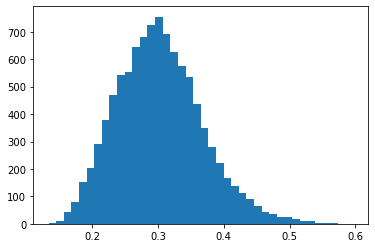

In [156]:
plt.hist(quals, bins=40)

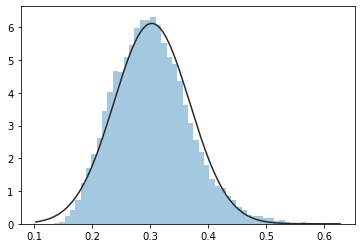

In [157]:
import seaborn as sns
from scipy.stats import norm
sns.distplot(quals,  fit=norm, kde=False)

In [158]:
fit_res = norm.fit(quals)
print(fit_res)

(0.3026437810576967, 0.06517591301078589)


In [159]:
np.mean(quals)

0.3026437810576967

In [160]:
# quad exponential dropoff
norm.pdf(0.87,*fit_res)*25*10**3

5.37028168869388e-12

In [161]:
# exponential dropoff
np.exp(-abs(0.87-fit_res[0])/fit_res[1])*25*10**3

4.143880620375357

In [162]:
#quadratic dropoff
((0.87-fit_res[0])**2/fit_res[1]/fit_res[1])**(-1)*25*10**3

329.91542158266026